# Đề thi tham khảo CK ĐSTT tính toán trong Khoa học dữ liệu
## Trường ĐH Công nghiệp TPHCM - Khoa CNTT

In [1]:
import numpy as np

> Thời gian làm bài: $90$ phút. SV được dùng tài liệu và Internet.

### Bài 1. (2đ) tính toán trên ma trận
Cho hai ma trận vuông $3 \times 3$ sau đây:
$$A=\left( \begin{matrix}
   2 & 2 & 1  \\
   2 & 5 & 3  \\
   2 & 3 & 5  \\
\end{matrix} \right) \text{ và } B=\left( \begin{matrix}
   3 & 1 & 2  \\
   -1 & 2 & 4  \\
   2 & 6 & 3  \\
\end{matrix} \right).$$
- **a)** Hỏi trong các đẳng thức sau có bao nhiêu đẳng thức đúng, hãy kiểm chứng bằng code: $$(A+B)^T = A^T+B^T, \, AB=BA, \,(AB)^{-1} = B^{-1}A^{-1}.$$
- **b)** Tìm ma trận $C$ thỏa mãn $AC - C = B$. *Gợi ý:* $C = CI = IC$ với $I$ là ma trận đơn vị.
- **c)** Tìm vector $\textbf{x}$ thỏa mãn $A\textbf{x} = B \textbf{b}$ với $\textbf{x}^T = (x_1,x_2,x_3)$ và $\textbf{b}^T = (1,-2,-3)?$ Hỏi có tồn tại vector $\textbf{x}$ để cho $A\textbf{x} = \textbf{b}B$ hay không? Vì sao?

In [16]:
A = np.array([[2,2,1],[2,5,3],[2,3,5]])
B = np.array([[3,1,2],[-1,2,4],[2,6,3]])
print('(A+B)^T = A^T + B^T: ',np.allclose((A+B).T, A.T+B.T))
print('AB=BA', np.allclose(A@B,B@A))
print('AB^-1 = B^-1 A^-1', np.allclose(np.linalg.inv(A@B),np.linalg.inv(B) @ np.linalg.inv(A)))

(A+B)^T = A^T + B^T:  True
AB=BA False
AB^-1 = B^-1 A^-1 True


In [17]:
# câu b:
I = np.eye(3)
try:
    C = B @ np.linalg.inv(A-I)
    print(C)
except:
    print('A-I không nghịch đảo được')
    

[[ 15. -11.   5.]
 [-19.  13.  -4.]
 [ -4.   5.  -2.]]


In [24]:
b = np.array([1,-2,-3]).T
Bb = B @ b
x = np.linalg.solve(A,Bb)
print(x)

[ 1. -2. -3.]


không thể so sánh vì kích thước khác nhau

### Bài 2. (2 điểm) phân rã LU
Cho ma trận vuông $4 \times 4$ sau đây:
$$A=\left( \begin{matrix}
   3 & 2 & 5 & 9  \\
   1 & 7 & 5 & 7  \\
   5 & 10 & 5 & 3 \\
   6 & 9 & 7 & 2
\end{matrix} \right).$$

* a) Hãy phân tích ma trận $A$ thành các thành phần $P, L, U$ (bằng thư viện thích hợp) và in ra kết quả.
* b) Tái tạo (phục hồi) ma trận $A$ từ các thành phần $P, L, U.$
* c) Hỏi phân rã LU có những ứng dụng thực tế nào?

In [28]:
from scipy.linalg import lu
A = np.array([[3,2,5,9],[1,7,5,7],[5,10,5,3],[6,9,7,2]])
P,L,U = lu(A)
print(P)
print(L)
print(U)

print('tái tạo: \n',(P) @ L @ U)

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
[[ 1.          0.          0.          0.        ]
 [ 0.16666667  1.          0.          0.        ]
 [ 0.5        -0.45454545  1.          0.        ]
 [ 0.83333333  0.45454545 -0.79439252  1.        ]]
[[ 6.          9.          7.          2.        ]
 [ 0.          5.5         3.83333333  6.66666667]
 [ 0.          0.          3.24242424 11.03030303]
 [ 0.          0.          0.          7.06542056]]
tái tạo: 
 [[ 3.  2.  5.  9.]
 [ 1.  7.  5.  7.]
 [ 5. 10.  5.  3.]
 [ 6.  9.  7.  2.]]


### ứng dụng của LU

Giải hệ phương trình

Tính nghịch đảo

Mô phỏng vật lý/kỹ thuật

Ứng dụng học máy, đồ họa, điều khiển, v.v.

### Bài 3. (2.5đ) bình phương cực tiểu
Một thí nghiệm xét mối liên hệ giữa độ giảm trọng lượng của hợp chất ($y$, tính bằng gam) và khoảng thời gian mà hợp chất tiếp xúc với không khí ($x$, tính bằng năm), trong đó số âm có thể hiểu là giai đoạn xử lý nguyên liệu, trước khi điều chế ra hợp chất. Ta có bảng dữ liệu như sau:

| $x$    | $-2$ | $0$   | $1$  | $2$  | $4$   |
|--------|------|-------|------|------|-------|
| $y$    | $-1$ | $1.5$ | $3.1$| $6.3$| $11.1$| 

- **a)** Giả sử $x,y$ thỏa mãn mô hình $y=a+bx+c \ln(x^2+1).$ Hãy sử dụng phương pháp bình phương cực tiểu, ước lượng các tham số $a,b,c.$ <br>
- **b)** Vẽ đồ thị cho dữ liệu. Sử dụng kết quả trên để dự đoán $y$ khi $x = 6.5$. <br>
- **c)** Hỏi có nên dùng mô hình $y=a+bx+c \ln(x)$ hoặc $y = a+bx+\frac{c}{x}$ để xấp xỉ dữ liệu trên không? Vì sao?

In [4]:
import numpy as np

x = np.array([-2, 0, 1, 2, 4])
y = np.array([-1, 1.5, 3.1, 6.3, 11.1])
# Tạo các cột tương ứng với a, b, c

ln_term = np.log(x**2 + 1)  # np.log là log tự nhiên (ln)
A = np.column_stack((np.ones_like(x), x, ln_term))  # Ma trận hệ số
b = y.reshape(-1, 1)  # Vector kết quả
# Tính nghiệm theo công thức bình phương cực tiểu
theta = np.linalg.inv(A.T @ A) @ A.T @ b
a, b_, c = theta.flatten()
print(f"Hệ số xấp xỉ: a = {a:.4f}, b = {b_:.4f}, c = {c:.4f}")


Hệ số xấp xỉ: a = 1.1445, b = 1.8115, c = 0.9221


Dự đoán y tại x = 6.5: 16.3931


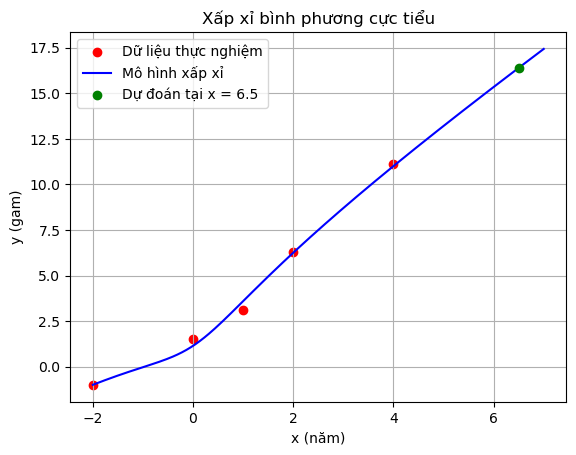

In [2]:
import matplotlib.pyplot as plt

# Dữ liệu gốc
plt.scatter(x, y, color="red", label="Dữ liệu thực nghiệm")

# Hàm dự đoán theo mô hình đã tìm được
def predict(x):
    return a + b_ * x + c * np.log(x**2 + 1)

# Vẽ đường mô hình
x_model = np.linspace(-2, 7, 300)
y_model = predict(x_model)
plt.plot(x_model, y_model, label="Mô hình xấp xỉ", color="blue")

# Dự đoán tại x = 6.5
x_new = 6.5
y_new = predict(x_new)
plt.scatter([x_new], [y_new], color="green", label=f"Dự đoán tại x = {x_new}", zorder=5)
print(f"Dự đoán y tại x = {x_new}: {y_new:.4f}")

plt.xlabel("x (năm)")
plt.ylabel("y (gam)")
plt.title("Xấp xỉ bình phương cực tiểu")
plt.legend()
plt.grid(True)
plt.show()


### Bài 4. (2.5đ) quá trình Markov
Theo khảo sát trong sinh viên của ĐH ở TPHCM đối với ba quán cafe $A,B,C$ trước cổng trường thì người ta có thông tin về sự thay đổi lượng khách đến quán sau mỗi tuần như bên dưới, cho biết thêm rằng ban đầu, hai quán $A,B$ chưa mở nên $100\%$ khách đều đến $C$:
 * + Trong những SV đến quán cafe $A$, sẽ có $20\%$ người tiếp tục đến $A$, có $60\%$ người sang $B$ và $20\%$ người sang $C$.
 * + Trong những SV đến quán cafe $B$, sẽ có $10\%$ người sang $A$, có $40\%$ người tiếp tục đến $B$ và $50\%$ người sang $C$.
 * + Trong những SV đến quán cafe $C$, sẽ có $70\%$ người sang $A$, có $20\%$ người sang $B$ và $10\%$ người tiếp tục đến $C$.

- **a)** Hãy lập ma trận chuyển trạng thái Markov $X$ kích thước $3 \times 3$ mô tả cho sự thay đổi của lượng người đến các quán. Từ đó tính tỷ lệ phần trăm những người đến quán $A,B,C$ sau $1$ tháng ($4$ tuần).
- **b)** Bằng cách khảo sát các lũy thừa ma trận với số mũ lớn, hãy cho biết thị phần ổn định của các quán sau khi hoạt động trong thời gian đủ lâu. Hãy thực hiện việc này bằng $2$ cách sau: dùng vòng lặp for, dùng thư viện của numpy.linalg.

In [58]:
#Gợi ý code mẫu như sau
from numpy.linalg import matrix_power
X = np.array([[0.2,0.6,0.2],[0.1,0.4,0.5],[0.7,0.2,0.1]]) # ma trận chuyển trạng thái
v = np.array([0,0,1]) # vector mô tả tỷ lệ khách ban đầu của A, B, C
#a) sau khi hoạt động một tháng
print('sau khi hoạt động 1 tháng(4 tuần)')
v_1thang = v @ matrix_power(X,4)
print('tỉ lệ của quán A sau 4 tuần: ', v_1thang[0])
print('tỉ lệ của quán B sau 4 tuần: ', v_1thang[1])
print('tỉ lệ của quán C sau 4 tuần: ', v_1thang[2])
#b) Chọn lũy thừa thích hợp đến khi ma trận hội tụ thì nêu đáp số
#Cách 1: dùng thư viện
X1 = np.linalg.eig(X)
#Cách 2: dùng vòng lặp:
X2 = X
for _ in range(1001):
    v_next_next = v @ matrix_power(X,_)
    if np.allclose(v_next_next,v_next, atol= 1e-8):
        print(v_next_next)
        break
    v_next = v_next_next
    
    

sau khi hoạt động 1 tháng(4 tuần)
tỉ lệ của quán A sau 4 tuần:  0.32589999999999997
tỉ lệ của quán B sau 4 tuần:  0.3884
tỉ lệ của quán C sau 4 tuần:  0.2857
[0.30555636 0.40277775 0.29166589]


### Bài 5. (1đ) xử lý ảnh
- **a)** Hãy tải về một ảnh bất kỳ, đặt tên là *picture.jpg*, hiển thị lên notebook và cho biết tỷ lệ giữa chiều dài, rộng của nó.
- **b)** Hãy chỉnh sửa ra một ảnh mới với tên *new_pic.jpg* từ ảnh ở trên với kích thước mới có tỷ lệ chiều dài, rộng bằng tỷ lệ của giấy in, tức là $1 : \sqrt{2}$. Hãy cho biết cơ sở nào của đại số tuyến tính được sử dụng trong các thao tác xử lý ảnh này?

2185 3000
Tỷ lệ chiều dài/rộng của ảnh gốc: 0.73
437 600
Tỷ lệ chiều dài/rộng của ảnh đã thu nhỏ: 0.73


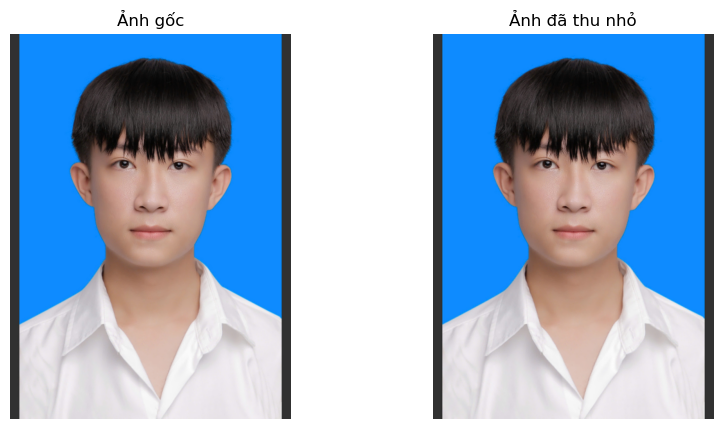

Ảnh đã được thu nhỏ và hiển thị thành công!


In [43]:
from PIL import Image
import math
import matplotlib.pyplot as plt
from IPython.display import display

try:
    # Load ảnh gốc
    img = Image.open('hinhthe.jpg')  # File đã xác nhận tồn tại trong thư mục DSTTTT
    width, height = img.size
    print(width, height)
    # Tính tỷ lệ chiều dài/rộng của ảnh gốc
    original_ratio = width / height
    print(f"Tỷ lệ chiều dài/rộng của ảnh gốc: {original_ratio:.2f}")

    # Thu nhỏ với tỷ lệ 1:√2
    scale = 1 / 5
    new_width = int(width * scale)
    new_height = int(height * scale)
    
    # Resize ảnh
    resized_img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    print(new_width , new_height)
    resized_img.save('resized_pic.jpg')  # Lưu ảnh đã thu nhỏ
    
    # Tính tỷ lệ chiều dài/rộng của ảnh đã thu nhỏ
    resized_ratio = new_width / new_height
    print(f"Tỷ lệ chiều dài/rộng của ảnh đã thu nhỏ: {resized_ratio:.2f}")
    
    # Hiển thị ảnh gốc và ảnh đã thu nhỏ trên notebook
    plt.figure(figsize=(10, 5))
    
    # Ảnh gốc
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Ảnh gốc")
    plt.axis('off')
    
    # Ảnh đã thu nhỏ
    plt.subplot(1, 2, 2)
    plt.imshow(resized_img)
    plt.title("Ảnh đã thu nhỏ")
    plt.axis('off')
    
    plt.show()
    
    print("Ảnh đã được thu nhỏ và hiển thị thành công!")
    
except FileNotFoundError:
    print("Lỗi: Không tìm thấy file ảnh. Vui lòng kiểm tra tên file hoặc đường dẫn.")
except Exception as e:
    print(f"Đã xảy ra lỗi: {e}")